#  Sinusoids  - Time and Spectrum  
This program is an introductory program to DSP

# Time Domain
Inputs: Signal Parameters for two signals  
Outputs: A visual representation of the two signals

In [1]:
%matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pyplot  as plt
import math
from scipy.fftpack import fft, ifft, fftfreq

<StemContainer object of 3 artists>

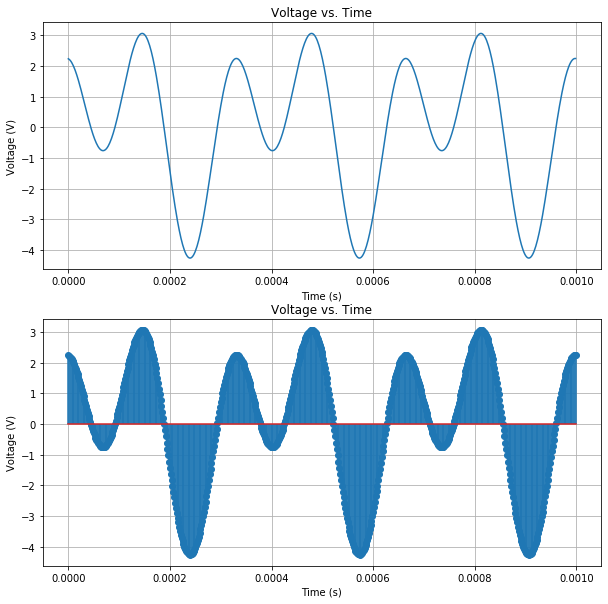

In [7]:
duration =  1e-3 # Duration of the sample
Fs = 100*6000    # Sampling frequency

# 1st Signal
freq  = 3000 # Frequency of the signal
amp   = 1.8  # Signal Amplitutde
theta = 0    # Phase Control
t  = np.arange(0,duration, 1/Fs) # X axis: Time & Samples
s1 = amp*np.sin(2*np.pi*freq*t + theta)

# 2nd  Signal
freq  = 6000 # Frequency of the signal
amp   = 2.5  # Signal Amplitutde
theta = 90   # Phase Control
t  = np.arange(0,duration, 1/Fs) # X axis: Time & Samples
s2 = amp*np.sin(2*np.pi*freq*t + theta)

#Combination of two signals
s_total = s1  + s2

# Waveform display
fig = plt.figure('position', [10,10])
ax  = fig.subplots(2,1) #Fig: figure object, ax: plot axes
ax[0].set(xlabel='Time (s)', ylabel='Voltage (V)', title='Voltage vs. Time')
ax[0].grid()
ax[0].plot(t,s_total)

#Stem plot
ax[1].set(xlabel='Time (s)', ylabel='Voltage (V)', title='Voltage vs. Time')
ax[1].grid()
ax[1].stem(t,s_total, use_line_collection=True)

### Sampling Rate Effects

The graphs produced are the the exact same signal with different sampling rates. The signal with 10x the Nyquist Rate is a noticably cleaner sin wave while the signal that only has a sampling rate of 4x the Nyquist Rate only contains the peaks, the zero-padded points, and the x-intercepts.

<StemContainer object of 3 artists>

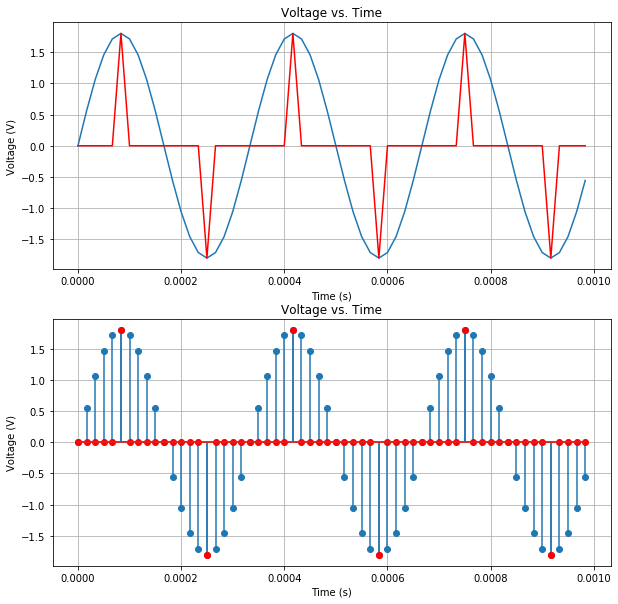

In [57]:
duration =  1e-3 # Duration of the sample
Fs = 20*3000    # Sampling frequency

# Signal
freq  = 3000 # Frequency of the signal
amp   = 1.8  # Signal Amplitutde
theta = 0    # Phase Control
t  = np.arange(0,duration, 1/Fs) # X axis: Time & Samples
s1 = amp*np.sin(2*np.pi*freq*t + theta)

# Signal at triple the sampling rate
freq  = 3000 # Frequency of the signal
amp   = 1.8  # Signal Amplitutde
theta = 0    # Phase Control
Fs = Fs/5    # 5x less the sampling rate
t2  = np.arange(0,duration, 1/Fs) # X axis: Time & Samples
s2 = amp*np.sin(2*np.pi*freq*t2 + theta)
zero_array = np.zeros(len(s2))  
zero_and_sig = np.vstack([s2, zero_array, zero_array, zero_array, zero_array])
s2 = zero_and_sig.flatten(order='F')

#Combination of two signals
s_total = s1  + s2

# Waveform display
fig = plt.figure('position', [10,10])
ax  = fig.subplots(2,1) #Fig: figure object, ax: plot axes
ax[0].set(xlabel='Time (s)', ylabel='Voltage (V)', title='Voltage vs. Time')
ax[0].grid()
ax[0].plot(t,s1, label='s1')
ax[0].plot(t,s2, label='s2', color = 'red')

#Stem plot
ax[1].set(xlabel='Time (s)', ylabel='Voltage (V)', title='Voltage vs. Time')
ax[1].grid()
ax[1].stem(t,s1, use_line_collection=True)
ax[1].stem(t,s2, use_line_collection=True, markerfmt='ro')

# Frequency Domain

4800


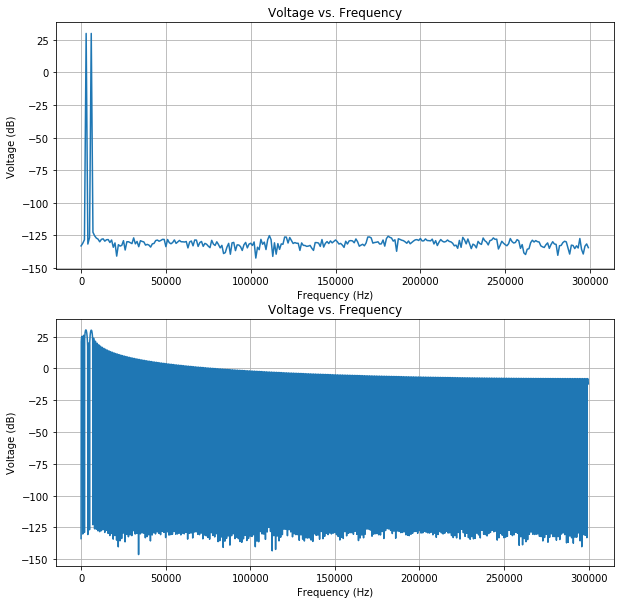

In [11]:
# Non-zero padded
NFFT = len(s_total)    # Number of samples in s_total
S = fft(s_total, NFFT) # Transform it
SS = 10*np.log10(abs(S[0:NFFT//2])) # 
F1 = fftfreq(NFFT,1/Fs)
F1 = F1[0:NFFT//2]

# Zero padded
NFFT = len(s_total)*8  # Number of samples in s_total
S = fft(s_total, NFFT) # Transform it
SS2 = 10*np.log10(abs(S[0:NFFT//2]))
F2 = fftfreq(NFFT,1/Fs)
F2 = F2[0:NFFT//2]

# Displaying the plots
fig = plt.figure('position', [10,10])
ax  = fig.subplots(2,1) #Fig: figure object, ax: plot axes
ax[0].set(xlabel='Frequency (Hz)', ylabel='Voltage (dB)', title='Voltage vs. Frequency')
ax[0].grid()
ax[0].plot(F1, SS)
ax[1].set(xlabel='Frequency (Hz)', ylabel='Voltage (dB)', title='Voltage vs. Frequency')
ax[1].grid()
ax[1].plot(F2, SS2)

print(NFFT)